In [25]:
import sys
sys.path.append('../thinkbayes2/')
from thinkbayes2 import Pmf, Suite
import matplotlib.pyplot as plt

## Rolling dice

We want to model rolling 5 dice of different sizes.

What is the chance that we have rolled a n-sided die given we rolled a 6?

The hypothesis (prior) is: "it's a n-sided die"
the data is: "we rolled a k"

The likelihood P(D|H) is: 1/n for any k (unless k > n)

In [7]:
class Dice(Suite):
    
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1.0/hypo

In [9]:
dice = Dice([4, 6, 8, 12, 20])
dice.Update(6)
dice.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


$P(H | D) = \frac{P(H)P(D | H)}{P(D)}$

## Multiple rolls of the dice

We keep updating the same Suite with each roll to find the chance of doing k-rolls of certain sides.

In [13]:
dice = Dice([4, 6, 8, 12, 20])
for roll in [6, 8, 7, 7, 5, 4]:
    dice.Update(roll)
dice.Print()

4 0.0
6 0.0
8 0.9158452719690099
12 0.08040342579700499
20 0.003751302233985067


## locomotive problem

A railroad company has N locomotives, which they number $1..N$. Given I see one day a locomotive with number 60, estimate the number of locomotives.

* $p(H)$ is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.
* $p(H|D)$ is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior**.
* $p(D|H)$ is the probability of the data under the hypothesis, called the **likelihood**.
* $p(D)$ is the probability of the data under any hypothesis, called the **normalizing constant**.

We can choose _informative_ and _uninformative_ priors. Informative priors will use additional information on the distribution of the priors, better modelling it. This information (provided through guesses, experts, ...) may seem subjective.  Uninformative priors can be sometimes the better choice because they let the data speak for themselves. Prior can be chosen to have desirable properties such as represnting minimal prior information on the estimated quantity

From teh book:

> Uninformative priors are appealing because they seem more objective. But I am generally in favor of using informative priors. Why? First, Bayesian analysis is always based on modeling decisions. Choosing the prior is one of those decisions, but it is not the only one, and it might not even be the most subjective. So even if an uninformative prior is more objective, the entire analysis is still subjective.

In [28]:
class Locomotives(Suite):
    
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            # use the powerlaw for the distribution of priors. The assumption comes
            # from the reported powerlaw distribution of company sizes.
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        if data <= hypo:
            return 1.0/hypo
        else:
            return 0.0

Text(0,0.5,'P(H|D)')

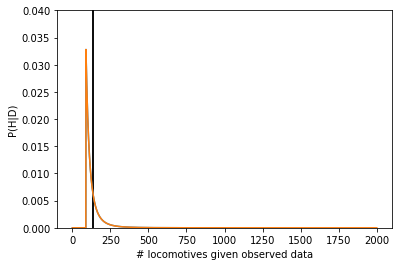

In [42]:
hypos = range(1,1001)
loco = Locomotives(hypos)
loco.Update(30)
loco.Update(60)
loco.Update(90)
pmf = loco.Probs(hypos)
plt.plot(hypos, pmf)
meansz = loco.Mean()
plt.vlines(meansz, 0, 0.1, 'k')
plt.ylim([0, 0.04])

# alternative
hypos_alt = range(1,2001)
loco_alt = Locomotives(hypos_alt)
loco_alt.Update(30)
loco_alt.Update(60)
loco_alt.Update(90)
pmf2 = loco_alt.Probs(hypos_alt)
plt.plot(hypos_alt, pmf2)
meansz2 = loco_alt.Mean()
plt.vlines(meansz2, 0, 0.1, 'k')
plt.xlabel('# locomotives given observed data')
plt.ylabel('P(H|D)')

We see that with the powerlaw distribution for the prior and three observations (|data|) that for different maximum size of company we get very similar expected value on the posterior (# locomotoves that the company owns given the data).

In [40]:
95/100

0.95

## intervals

we can calculate easily confidence intervals on the posterior distribution

In [44]:
def Percentile(pmf, percentage):
    maxp = percentage / 100.0
    tot = 0.0
    for val, prob in pmf.Items():
        tot += prob
        if tot >= maxp:
            return val
        
interval = Percentile(loco, 5.0), Percentile(loco, 95.0)
print(interval)

(91, 242)


In [45]:
cdf = loco.MakeCdf()
interval = cdf.Percentile(5), cdf.Percentile(95)
print(interval)

(91, 242)


## Exercise 3.1: many companies

In [ ]:
class Railroads(Locomotives):
    
    def Likelihood(self, data, hypo):
        
        if data <= hypo:
            return 1.0/hypo
        else:
            return 0.0